In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel('housing.xlsx')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [5]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
ocean_proximity           5
median_house_value     3842
dtype: int64

In [6]:
pd.unique(df['ocean_proximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
#Converting Categorical data into Numerical data using LabelEncoder

In [8]:
df['ocean_proximity']=LabelEncoder().fit_transform(df['ocean_proximity'])
df['ocean_proximity']

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int64

In [9]:
pd.unique(df['ocean_proximity'])

array([3, 0, 1, 4, 2])

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

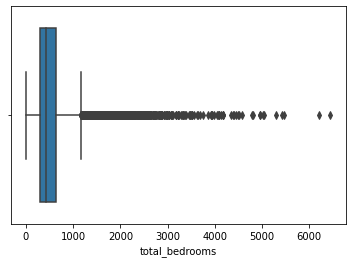

In [11]:
sns.boxplot(x=df['total_bedrooms'])
plt.show()

In [12]:
#Filling missing values with the median of the respective column

In [13]:
med=df['total_bedrooms'].median()
df['total_bedrooms']=df['total_bedrooms'].fillna(med)
print(med)
df.isnull().sum()

435.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

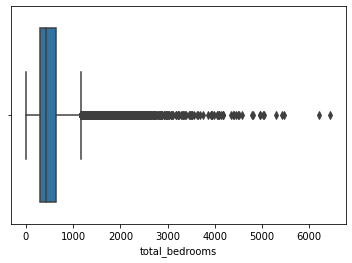

In [14]:
sns.boxplot(x=df['total_bedrooms'])
plt.show()

In [15]:
#Finding maximum, minimum, and mean value of each attribute

In [16]:
for i in df.columns:
    l=[]
    l.append(np.max(df[i]))
    l.append(np.min(df[i]))
    l.append(np.mean(df[i]))
    print("For",i)
    print("Mean value = ",l[2])
    print("Max value = ",l[0])
    print("Min value = ",l[1])
    print()

For longitude
Mean value =  -119.56970445736432
Max value =  -114.31
Min value =  -124.35

For latitude
Mean value =  35.63186143410853
Max value =  41.95
Min value =  32.54

For housing_median_age
Mean value =  28.639486434108527
Max value =  52
Min value =  1

For total_rooms
Mean value =  2635.7630813953488
Max value =  39320
Min value =  2

For total_bedrooms
Mean value =  536.8388565891473
Max value =  6445.0
Min value =  1.0

For population
Mean value =  1425.4767441860465
Max value =  35682
Min value =  3

For households
Mean value =  499.5396802325581
Max value =  6082
Min value =  1

For median_income
Mean value =  3.8706710029069766
Max value =  15.0001
Min value =  0.4999

For ocean_proximity
Mean value =  1.165843023255814
Max value =  4
Min value =  0

For median_house_value
Mean value =  206855.81690891474
Max value =  500001
Min value =  14999



In [17]:
#Since some of the attribute max and min values are not lying within the range of mean value, we need to Standardize the data

In [18]:
names = df.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.291089,1.172900


In [19]:
#Checking for the outlierdata

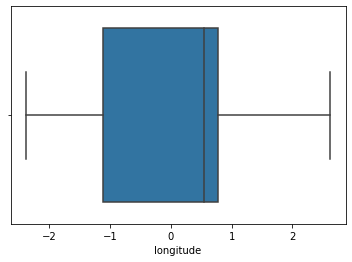

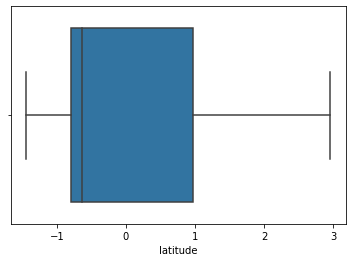

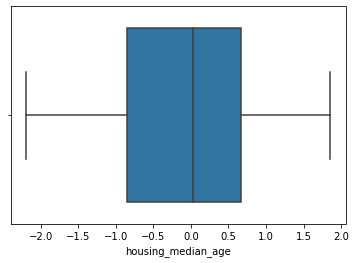

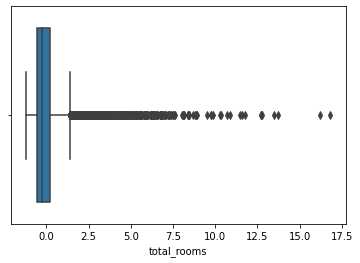

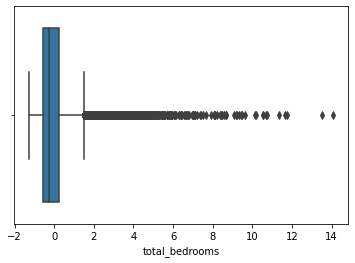

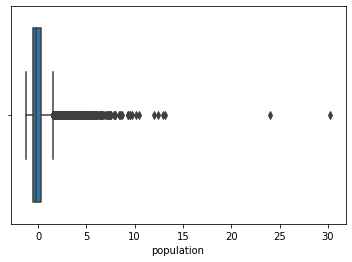

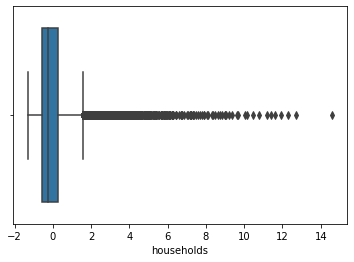

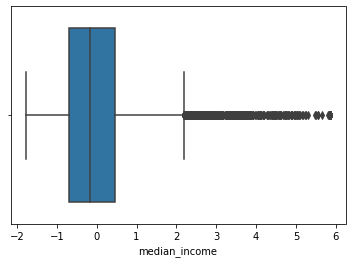

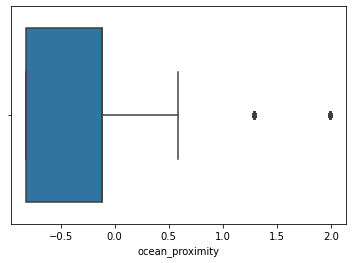

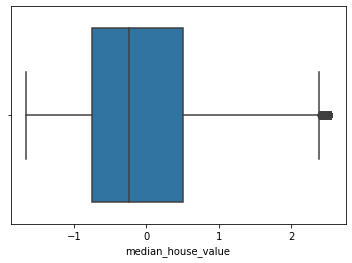

In [20]:
for i in scaled_df:
    sns.boxplot(x=scaled_df[i])
    plt.show()

In [21]:
scaled_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [22]:
#Creating lists to store the quartile 1,3,IQR ranges and also for finding the upper limit from q3 quartile

In [23]:
q1=[]
q3=[]
IQR=[]
Upper=[]

In [24]:
#Storing the range of 1st quartile of each attribute in list q1

In [25]:
q1.append(np.percentile(scaled_df.longitude,25))
q1.append(np.percentile(scaled_df.latitude,25))
q1.append(np.percentile(scaled_df.housing_median_age,25))
q1.append(np.percentile(scaled_df.total_rooms,25))
q1.append(np.percentile(scaled_df.total_bedrooms,25))
q1.append(np.percentile(scaled_df.population,25))
q1.append(np.percentile(scaled_df.households,25))
q1.append(np.percentile(scaled_df.median_income,25))
q1.append(np.percentile(scaled_df.ocean_proximity,25))
q1.append(np.percentile(scaled_df.median_house_value,25))

In [26]:
#Storing the range of 3rd quartile of each attribute in list q3

In [27]:
q3.append(np.percentile(scaled_df.longitude,75))
q3.append(np.percentile(scaled_df.latitude,75))
q3.append(np.percentile(scaled_df.housing_median_age,75))
q3.append(np.percentile(scaled_df.total_rooms,75))
q3.append(np.percentile(scaled_df.total_bedrooms,75))
q3.append(np.percentile(scaled_df.population,75))
q3.append(np.percentile(scaled_df.households,75))
q3.append(np.percentile(scaled_df.median_income,75))
q3.append(np.percentile(scaled_df.ocean_proximity,75))
q3.append(np.percentile(scaled_df.median_house_value,75))

In [28]:
#Storing the range of iqr quartile of each attribute in list IQR
#Storing the range of upper bound of each attribute in list Upper

In [29]:
for i in range(len(q1)):
    IQR.append(q3[i]-q1[i])
    Upper.append(q3[i]+1.5*IQR[i])

In [30]:
#Clipping the outlier values within the upper bound by using clip function
#By this outliers of each attribute can be removed

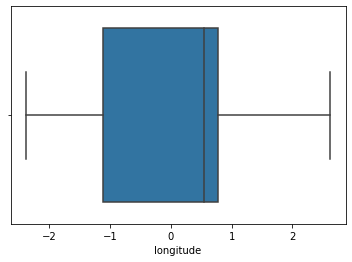

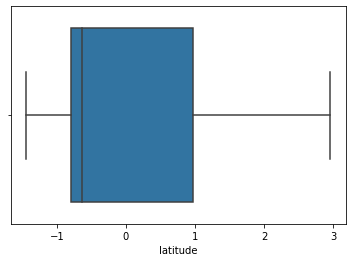

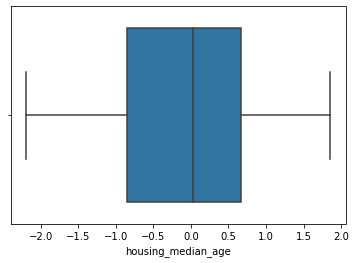

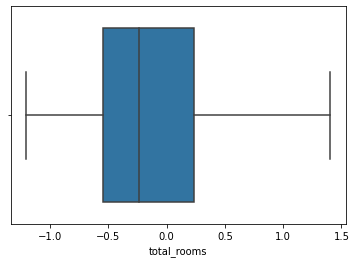

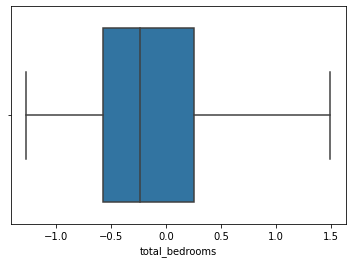

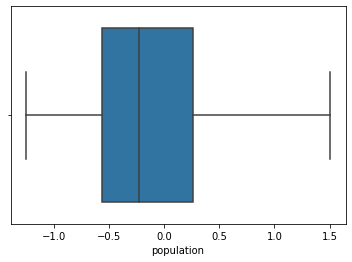

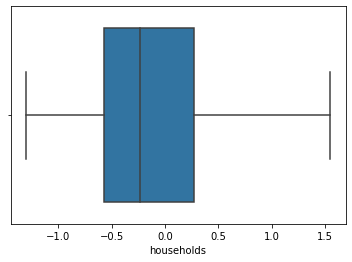

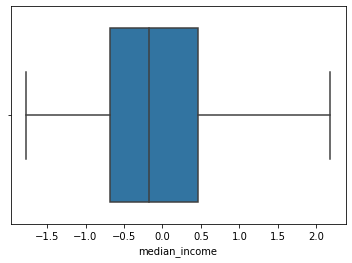

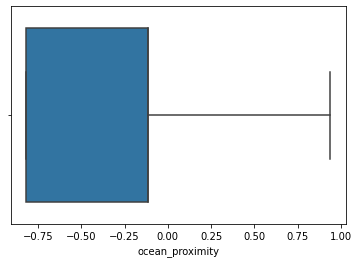

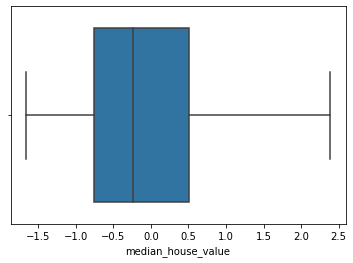

In [31]:
j=0
for i in scaled_df.columns:
    scaled_df[i].clip(upper=Upper[j],axis=0,inplace=True)
    sns.boxplot(x=scaled_df[i])
    plt.show()
    j=j+1

In [32]:
q1

[-1.1132090133203263,
 -0.7967886666838826,
 -0.8453931491070593,
 -0.5445698369434634,
 -0.5718867710043797,
 -0.5638088898975032,
 -0.5742294370397054,
 -0.6881186061281377,
 -0.8206532438730988,
 -0.7561633089765214]

In [33]:
q3

[0.7784964041142217,
 0.9729565662132671,
 0.6643103438679743,
 0.23480278088632262,
 0.2537333861141756,
 0.26449494973264465,
 0.27584270864354,
 0.4593063273652874,
 -0.11673922843276467,
 0.5014972585678981]

In [34]:
IQR

[1.891705417434548,
 1.7697452328971497,
 1.5097034929750337,
 0.779372617829786,
 0.8256201571185553,
 0.8283038396301479,
 0.8500721456832454,
 1.1474249334934252,
 0.7039140154403342,
 1.2576605675444195]

In [35]:
x=df[scaled_df.columns.drop('median_house_value')]
y=df['median_house_value']

In [36]:
#Splitting the data into 80% training and 20% testing data

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15961,-122.43,37.71,52,1410,286.0,879,282,3.1908,3
1771,-122.35,37.95,42,1485,290.0,971,303,3.6094,3
16414,-121.24,37.90,16,50,10.0,20,6,2.6250,1
5056,-118.35,34.02,34,5218,1576.0,3538,1371,1.5143,0
8589,-118.39,33.89,38,1851,332.0,750,314,7.3356,0
...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17,1768,474.0,1079,436,1.7823,0
17289,-119.63,34.42,42,1765,263.0,753,260,8.5608,0
5192,-118.26,33.93,42,1433,295.0,775,293,1.1326,0
12172,-117.16,33.73,10,2381,454.0,1323,477,2.6322,1


In [39]:
y_train

15961    255600
1771     114600
16414    137500
5056     118800
8589     422700
          ...  
10955    205300
17289    500001
5192     104800
12172    140700
235      126000
Name: median_house_value, Length: 16512, dtype: int64

In [40]:
#Finding the correlation between each and every attribute of the dataset

<AxesSubplot:>

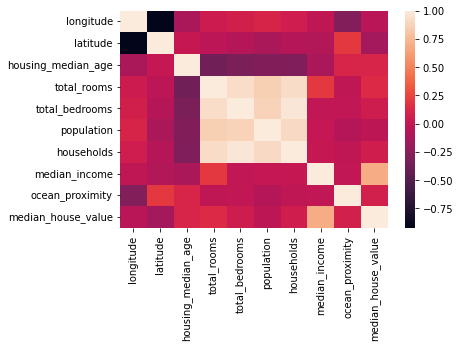

In [41]:
sns.heatmap(df.corr())

In [42]:
#Plotting the scatterplot for each independent variable(x) and dependent variable(y)

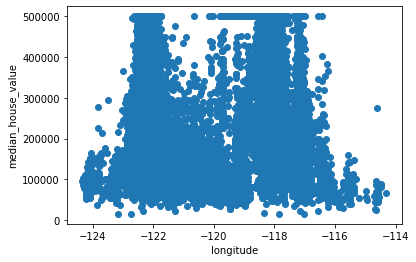

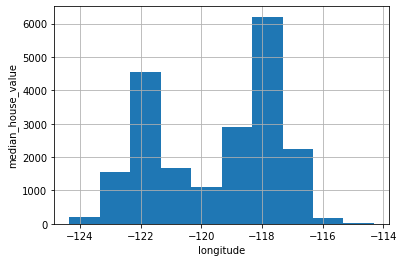

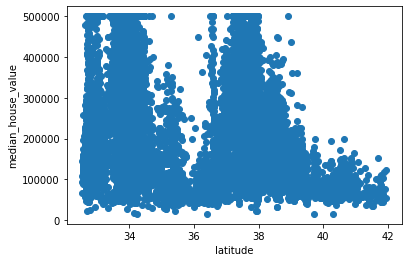

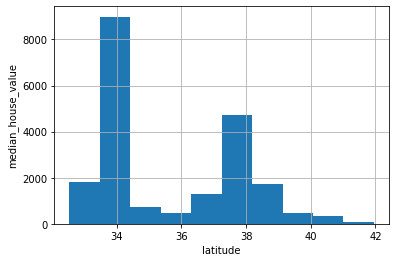

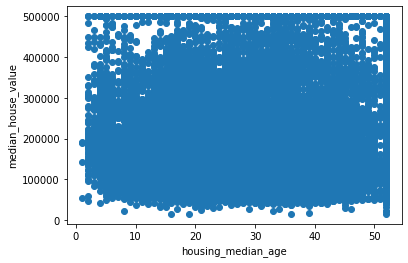

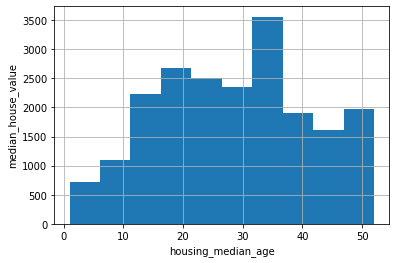

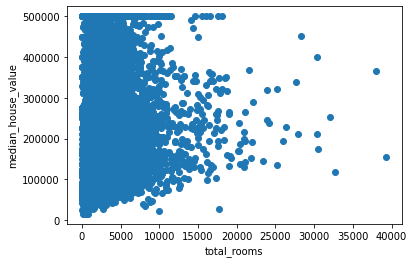

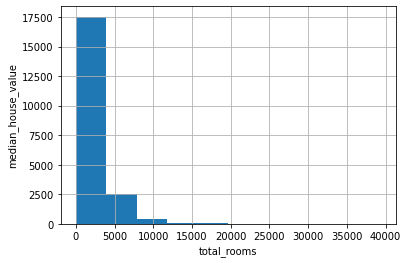

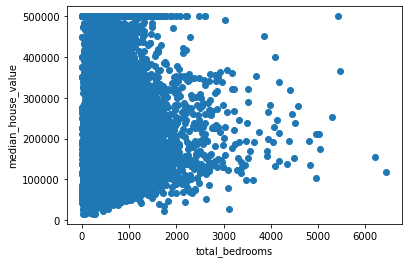

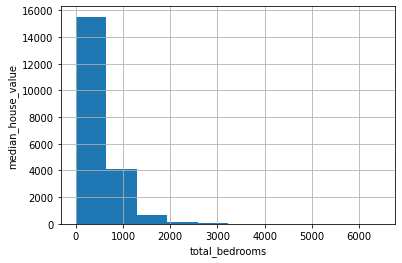

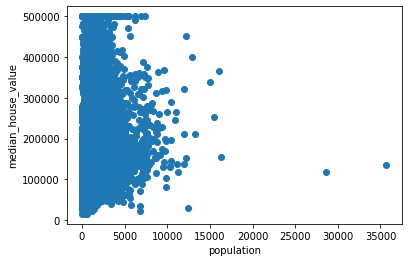

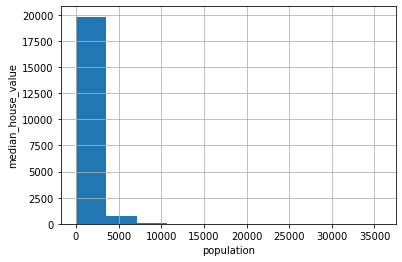

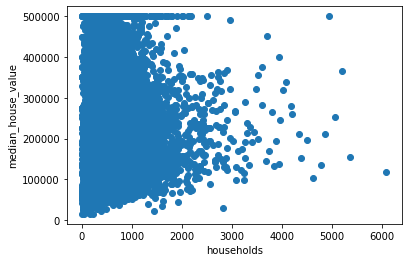

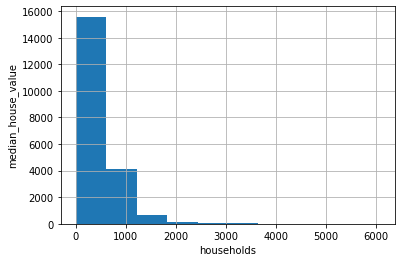

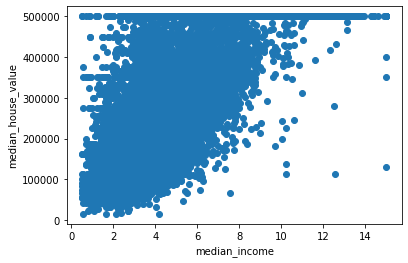

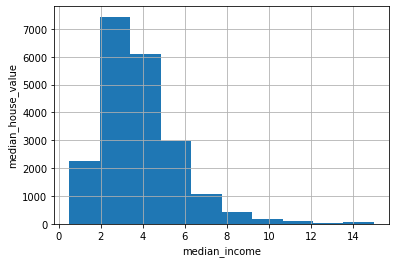

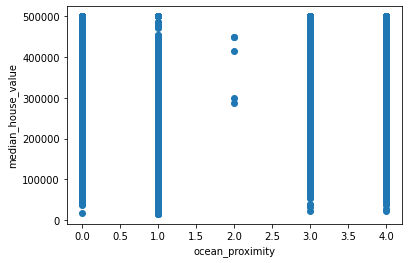

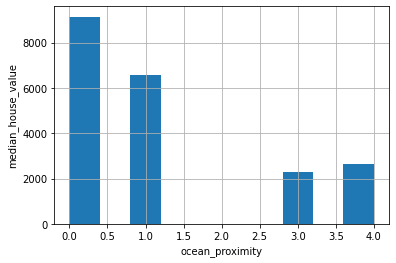

In [43]:
for i in x:
    plt.scatter(df[i],y)
    plt.xlabel(i)
    plt.ylabel('median_house_value')
    plt.show()
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel('median_house_value')
    plt.show()

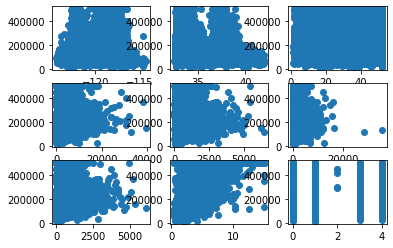

In [44]:
dfig,ax=plt.subplots(3,3)
ax[0][0].scatter(x=df.longitude,y=df.median_house_value)
ax[0][1].scatter(x=df.latitude,y=df.median_house_value)
ax[0][2].scatter(x=df.housing_median_age,y=df.median_house_value)
ax[1][0].scatter(x=df.total_rooms,y=df.median_house_value)
ax[1][1].scatter(x=df.total_bedrooms,y=df.median_house_value)
ax[1][2].scatter(x=df.population,y=df.median_house_value)
ax[2][0].scatter(x=df.households,y=df.median_house_value)
ax[2][1].scatter(x=df.median_income,y=df.median_house_value)
ax[2][2].scatter(x=df.ocean_proximity,y=df.median_house_value)

In [45]:
for i in df.columns:
    l=[]
    l.append(np.max(df[i]))
    l.append(np.min(df[i]))
    l.append(np.mean(df[i]))
    print("For ",i)
    print("Mean value = ",l[2])
    print("Max value = ",l[0])
    print("Min value = ",l[1])
    print()

For  longitude
Mean value =  -119.56970445736432
Max value =  -114.31
Min value =  -124.35

For  latitude
Mean value =  35.63186143410853
Max value =  41.95
Min value =  32.54

For  housing_median_age
Mean value =  28.639486434108527
Max value =  52
Min value =  1

For  total_rooms
Mean value =  2635.7630813953488
Max value =  39320
Min value =  2

For  total_bedrooms
Mean value =  536.8388565891473
Max value =  6445.0
Min value =  1.0

For  population
Mean value =  1425.4767441860465
Max value =  35682
Min value =  3

For  households
Mean value =  499.5396802325581
Max value =  6082
Min value =  1

For  median_income
Mean value =  3.8706710029069766
Max value =  15.0001
Min value =  0.4999

For  ocean_proximity
Mean value =  1.165843023255814
Max value =  4
Min value =  0

For  median_house_value
Mean value =  206855.81690891474
Max value =  500001
Min value =  14999



In [46]:
#Predicting the output by using MultipleLinearRegression

In [47]:
mul=LinearRegression()
mul

LinearRegression()

In [48]:
mul.fit(x_train,y_train)
y_pred=mul.predict(x_test)
x=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
inp=[]
inp.append(float(input("Enter longitude: ")))
inp.append(float(input("Enter latitude: ")))
inp.append(int(input("Enter housing_median_age: ")))
inp.append(int(input("Enter total_rooms: ")))
inp.append(float(input("Enter total_bedrooms: ")))
inp.append(int(input("Enter population: ")))
inp.append(int(input("Enter households: ")))
inp.append(float(input("Enter median_income: ")))
inp.append(int(input("Enter ocean_proximity: ")))
if inp[8]>4:
    print("Invalid Location")
else:
    out=mul.predict([inp])
    print("Accurate price for your needs is ",out,"$")


'''-122.43	37.71	52	1410	286.0	879	282	3.1908	3'''

Enter longitude: -122.43
Enter latitude: 37.71
Enter housing_median_age: 52
Enter total_rooms: 1410
Enter total_bedrooms: 286
Enter population: 879
Enter households: 282
Enter median_income: 3.1908
Enter ocean_proximity: 3
Accurate price for your needs is  [234077.76502924] $


/home/grt/583/dwdm/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'-122.43\t37.71\t52\t1410\t286.0\t879\t282\t3.1908\t3'

In [49]:
print("Accuracy of MultipleRegression : ",r2_score(y_test,y_pred))

Accuracy of MultipleRegression :  0.6277273885784147


In [50]:
#Predicting the output by using DecisionTreeRegression

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dec=DecisionTreeRegressor()
dec

DecisionTreeRegressor()

In [53]:
dec.fit(x_train,y_train)
if inp[8]>4:
    print("Invalid Location")
else:
    out=dec.predict([inp])
    print("Accurate price for your needs is ",out,"$")

Accurate price for your needs is  [255600.] $


/home/grt/583/dwdm/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [54]:
y_pred=dec.predict(x_test)

In [55]:
print("Accuracy of DecisonTreeRegression : ",r2_score(y_test,y_pred))

Accuracy of DecisonTreeRegression :  0.6341218953251627


In [56]:
#Predicting the output by using RandomForestRegression

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rand=RandomForestRegressor()
rand

RandomForestRegressor()

In [59]:
rand.fit(x_train,y_train)
if inp[8]>4:
    print("Invalid Location")
else:
    out=rand.predict([inp])
    print("Accurate price for your needs is ",out,"$")

Accurate price for your needs is  [254695.01] $


/home/grt/583/dwdm/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [60]:
y_pred = rand.predict(x_test)

In [61]:
print("Accuracy of RandomForestRegression : ",r2_score(y_test,y_pred))

Accuracy of RandomForestRegression :  0.8154096304138803


In [62]:
#Predicting the output by using LinearRegression

In [63]:
lin=LinearRegression()
lin.fit(x_train[['median_income']],y_train)

LinearRegression()

In [69]:
y_pred=lin.predict(x_test[['median_income']])

In [65]:
print("Accuracy of LinearRegression : ",r2_score(y_test,y_pred))

Accuracy for LinearRegression :  0.4719083593446771


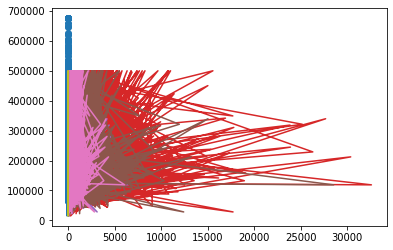

In [66]:
plt.plot(x_test,y_test)
plt.scatter(x_test['median_income'],y_pred)

In [67]:
inp=float(input("Enter median income: "))
y_pred=lin.predict([[inp]])
print("Accurate price for your needs is ",y_pred,"$")

Enter median income: 324566
Accurate price for your needs is  [1.36498163e+10] $


/home/grt/583/dwdm/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
